# 요상요상!

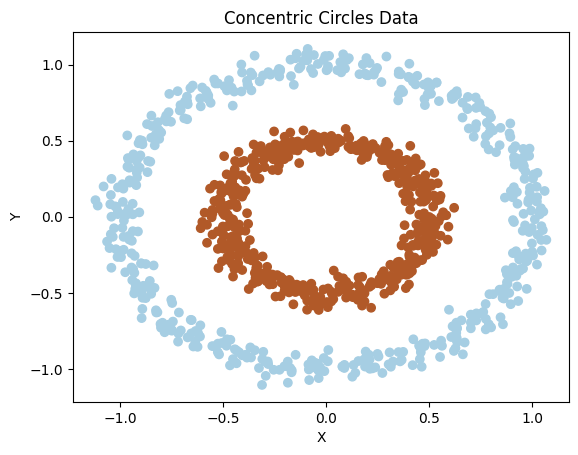

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# make_circles 함수로 두 개의 동심원 데이터를 생성
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.05)

# 데이터 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title('Concentric Circles Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Decision Tree는 잘 할까?

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# train/test 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Decision Tree 분류기 생성 및 학습
dt_clf = DecisionTreeClassifier(random_state=19980719)
dt_clf.fit(X_train, y_train)

# SVM 분류기 생성 및 학습
svm_clf = SVC(kernel='linear', random_state=19980719)
svm_clf.fit(X_train, y_train)

# 예측 및 정확도 계산
dt_pred = dt_clf.predict(X_test)
svm_pred = svm_clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

# 결과 출력
print(f'Decision Tree Accuracy: {dt_accuracy}')
print(f'SVM Accuracy: {svm_accuracy}')

Decision Tree Accuracy: 0.9925
SVM Accuracy: 0.485


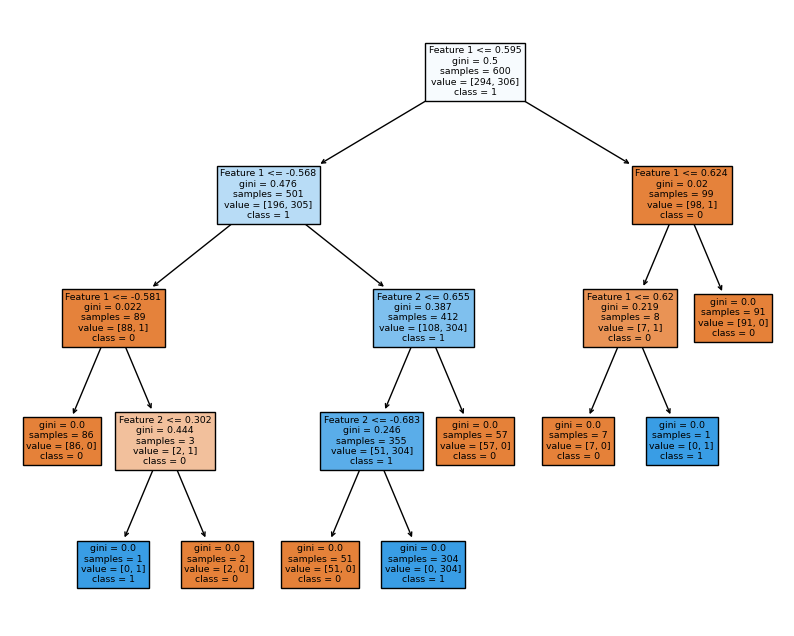

In [6]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 8))
plot_tree(dt_clf, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['0', '1'])
plt.show()

# Kernel Trick

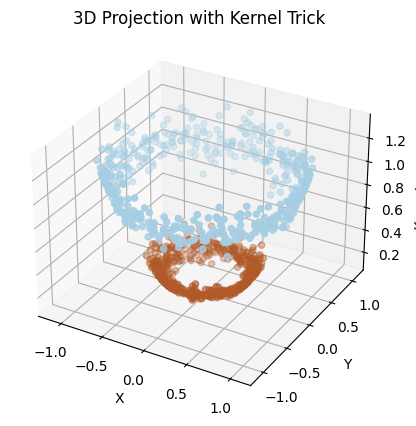

In [13]:
# 3D 커널 매핑: 새로운 z 축을 추가
def kernel_trick(X):
    z = X[:, 0]**2 + X[:, 1]**2  # 비선형적으로 데이터를 변환하여 z값을 만듦
    return z

# 3D로 변환된 z값
z = kernel_trick(X)

# 3D 데이터 시각화
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(122, projection='3d')

ax.scatter(X[:, 0], X[:, 1], z, c=y, cmap=plt.cm.Paired)
ax.set_title('3D Projection with Kernel Trick')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Kernel result')

plt.tight_layout()
plt.show()

## Trick 적용 이후, 분류를 다시 해보자.

In [25]:
kernel_X = np.c_[X, z]

In [26]:
# train/test 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(kernel_X, y, test_size=0.4, random_state=0)

# Decision Tree 분류기 생성 및 학습
dt_clf = DecisionTreeClassifier(random_state=19980719)
dt_clf.fit(X_train, y_train)

# SVM 분류기 생성 및 학습
svm_clf = SVC(kernel='linear', random_state=19980719)
svm_clf.fit(X_train, y_train)

# 예측 및 정확도 계산
dt_pred = dt_clf.predict(X_test)
svm_pred = svm_clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

# 결과 출력
print(f'Decision Tree Accuracy: {dt_accuracy}')
print(f'SVM Accuracy: {svm_accuracy}')

Decision Tree Accuracy: 1.0
SVM Accuracy: 1.0


# 커널의 종류

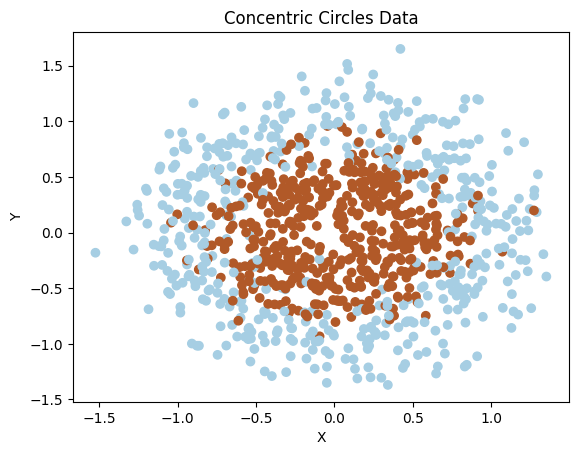

In [63]:
# make_circles 함수로 두 개의 동심원 데이터를 생성
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.2, random_state=19980719)

# 데이터 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title('Concentric Circles Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## 선형 커널 (기본)

In [64]:
# train/test 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# SVM 분류기 생성 및 학습
svm_clf = SVC(kernel='linear', random_state=19980719)
svm_clf.fit(X_train, y_train)

# 예측 및 정확도 계산
svm_pred = svm_clf.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

# 결과 출력
print(f'SVM Accuracy: {svm_accuracy}')

SVM Accuracy: 0.4875


## 다항식 커널

In [65]:
def poly_kernel_trick(X, c, d):
    z = np.dot(X, X.T) + c
    z = np.power(z, d)
    return z

z = poly_kernel_trick(X, -1, 2)

print("Before: ")
print(f"\t {np.shape(X)}")
print("After: ")
print(f"\t {np.shape(z)}")

Before: 
	 (1000, 2)
After: 
	 (1000, 1000)


In [66]:
# train/test 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(z, y, test_size=0.4, random_state=0)

# SVM 분류기 생성 및 학습
svm_clf = SVC(kernel='linear', random_state=19980719)
svm_clf.fit(X_train, y_train)

# 예측 및 정확도 계산
svm_pred = svm_clf.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

# 결과 출력
print(f'SVM Accuracy: {svm_accuracy}')

SVM Accuracy: 0.8775


## RBF 커널 (가우시안 커널)

In [67]:
def RBF_kernel_trick(X, gamma):
    # 모든 데이터 포인트 쌍 간의 거리 계산
    dist = np.linalg.norm(X[:, np.newaxis, :] - X[np.newaxis, :, :], axis=2)
    # RBF 커널 적용
    z = np.exp(-gamma * dist)
    return z

z = RBF_kernel_trick(X, 1)

print("Before: ")
print(f"\t {np.shape(X)}")
print("After: ")
print(f"\t {np.shape(z)}")

Before: 
	 (1000, 2)
After: 
	 (1000, 1000)


In [68]:
# train/test 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(z, y, test_size=0.4, random_state=0)

# SVM 분류기 생성 및 학습
svm_clf = SVC(kernel='linear', random_state=19980719)
svm_clf.fit(X_train, y_train)

# 예측 및 정확도 계산
svm_pred = svm_clf.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

# 결과 출력
print(f'SVM Accuracy: {svm_accuracy}')

SVM Accuracy: 0.8825


### \gamma 값에 따른 변화

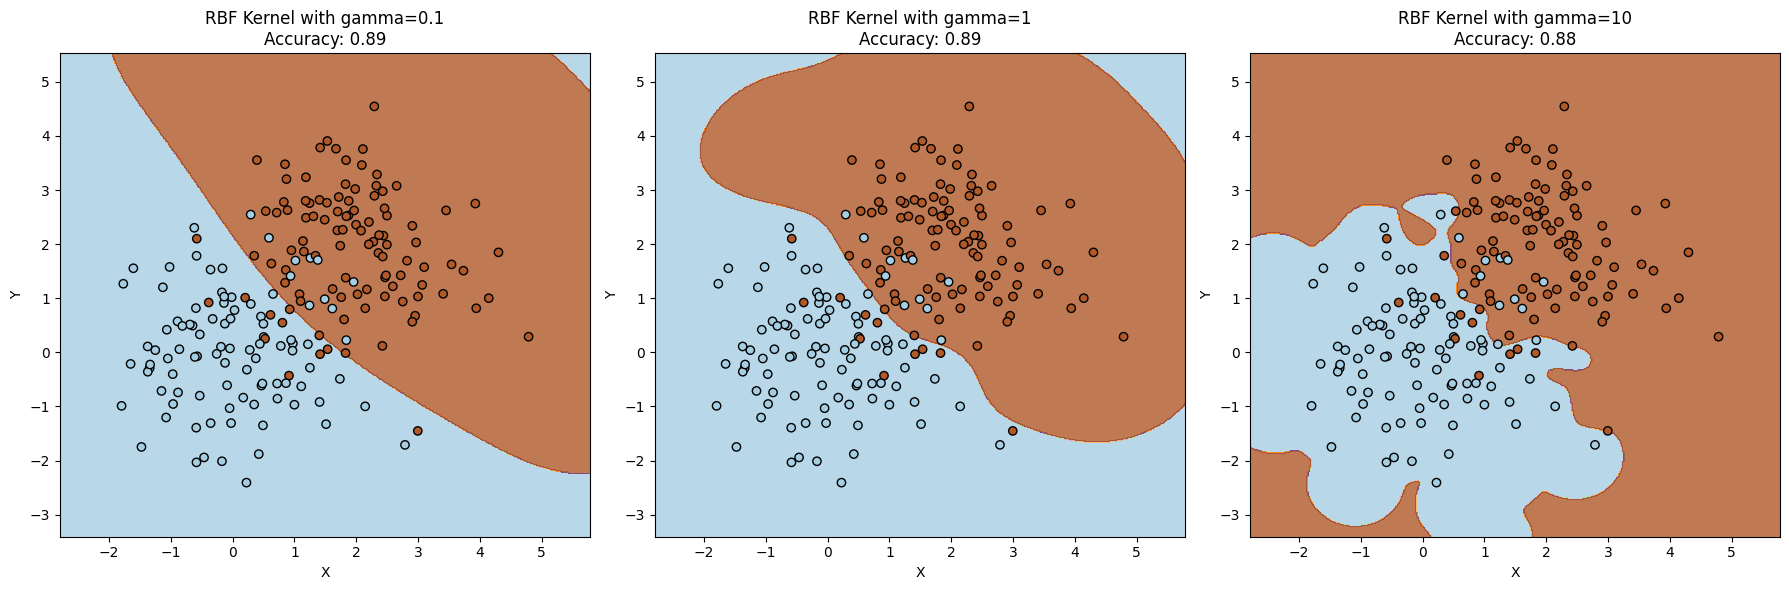

In [75]:
from sklearn.metrics import accuracy_score

X_simple = np.random.randn(250, 2)
y_simple = np.array([0]*250 + [1]*250)
X_simple = np.vstack([X_simple, X_simple + 2])

def plot_svm_decision_boundary_with_accuracy(X, y, model, title):
    # 결정 경계를 위한 그리드 생성
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # 모델로 예측
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 정확도 계산
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)

    # 결정 경계 시각화
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title(f"{title}\nAccuracy: {accuracy:.2f}")
    plt.xlabel('X')
    plt.ylabel('Y')

# 감마 값에 따른 RBF 커널 SVM 모델 학습 및 시각화 (정확도 포함)
gamma_values = [0.1, 1, 10]

plt.figure(figsize=(18, 6))

X_train, X_test, y_train, y_test = train_test_split(X_simple, y_simple, test_size=0.4, random_state=0)

for i, gamma in enumerate(gamma_values, 1):
    rbf_svm = SVC(kernel='rbf', gamma=gamma)
    rbf_svm.fit(X_train, y_train)
    plt.subplot(1, 3, i)
    plot_svm_decision_boundary_with_accuracy(X_test, y_test, rbf_svm, f'RBF Kernel with gamma={gamma}')

plt.tight_layout()
plt.show()

### Kernel 시각화

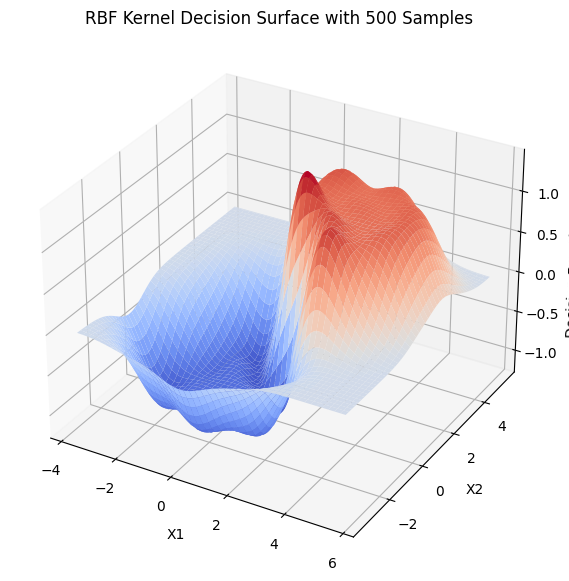

In [77]:
# 데이터를 500개로 생성 (250개씩 두 클래스)
X_simple = np.random.randn(250, 2)
y_simple = np.array([0]*250 + [1]*250)
X_scaled_simple = np.vstack([X_simple, X_simple + 2])  # 클래스 1 데이터를 이동시킴

# RBF 커널을 사용하는 SVM 학습 (500개의 샘플)
rbf_svm_simple = SVC(kernel='rbf', gamma=1.0)
rbf_svm_simple.fit(X_scaled_simple, y_simple)

# 시각화를 위해 3D 그리드 생성
h = .02
x_min, x_max = X_scaled_simple[:, 0].min() - 1, X_scaled_simple[:, 0].max() + 1
y_min, y_max = X_scaled_simple[:, 1].min() - 1, X_scaled_simple[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# RBF 커널에 의해 생성된 봉우리 형태 확인 (결정 함수 사용)
Z = rbf_svm_simple.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 3D 그래프 생성
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 3D 표면 플롯
ax.plot_surface(xx, yy, Z, cmap='coolwarm', edgecolor='none')

# 축 라벨 설정
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Decision Function Value')
ax.set_title('RBF Kernel Decision Surface with 500 Samples')

plt.show()

## Sigmoid kernel

In [71]:
from sklearn.metrics.pairwise import sigmoid_kernel

def sigmoid_kernel_trick(X, gamma, coef0):
  z = sigmoid_kernel(X, gamma=gamma, coef0=coef0)
  return z

gamma = 1
coef0 = 0
z = sigmoid_kernel_trick(X, gamma, coef0)

print("Before: ")
print(f"\t {np.shape(X)}")
print("After: ")
print(f"\t {np.shape(z)}")

Before: 
	 (1000, 2)
After: 
	 (1000, 1000)


In [72]:
# train/test 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(z, y, test_size=0.4, random_state=0)

# SVM 분류기 생성 및 학습
svm_clf = SVC(kernel='linear', random_state=19980719)
svm_clf.fit(X_train, y_train)

# 예측 및 정확도 계산
svm_pred = svm_clf.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

# 결과 출력
print(f'SVM Accuracy: {svm_accuracy}')

SVM Accuracy: 0.4875


# Sklearn package로 쉽게 하자

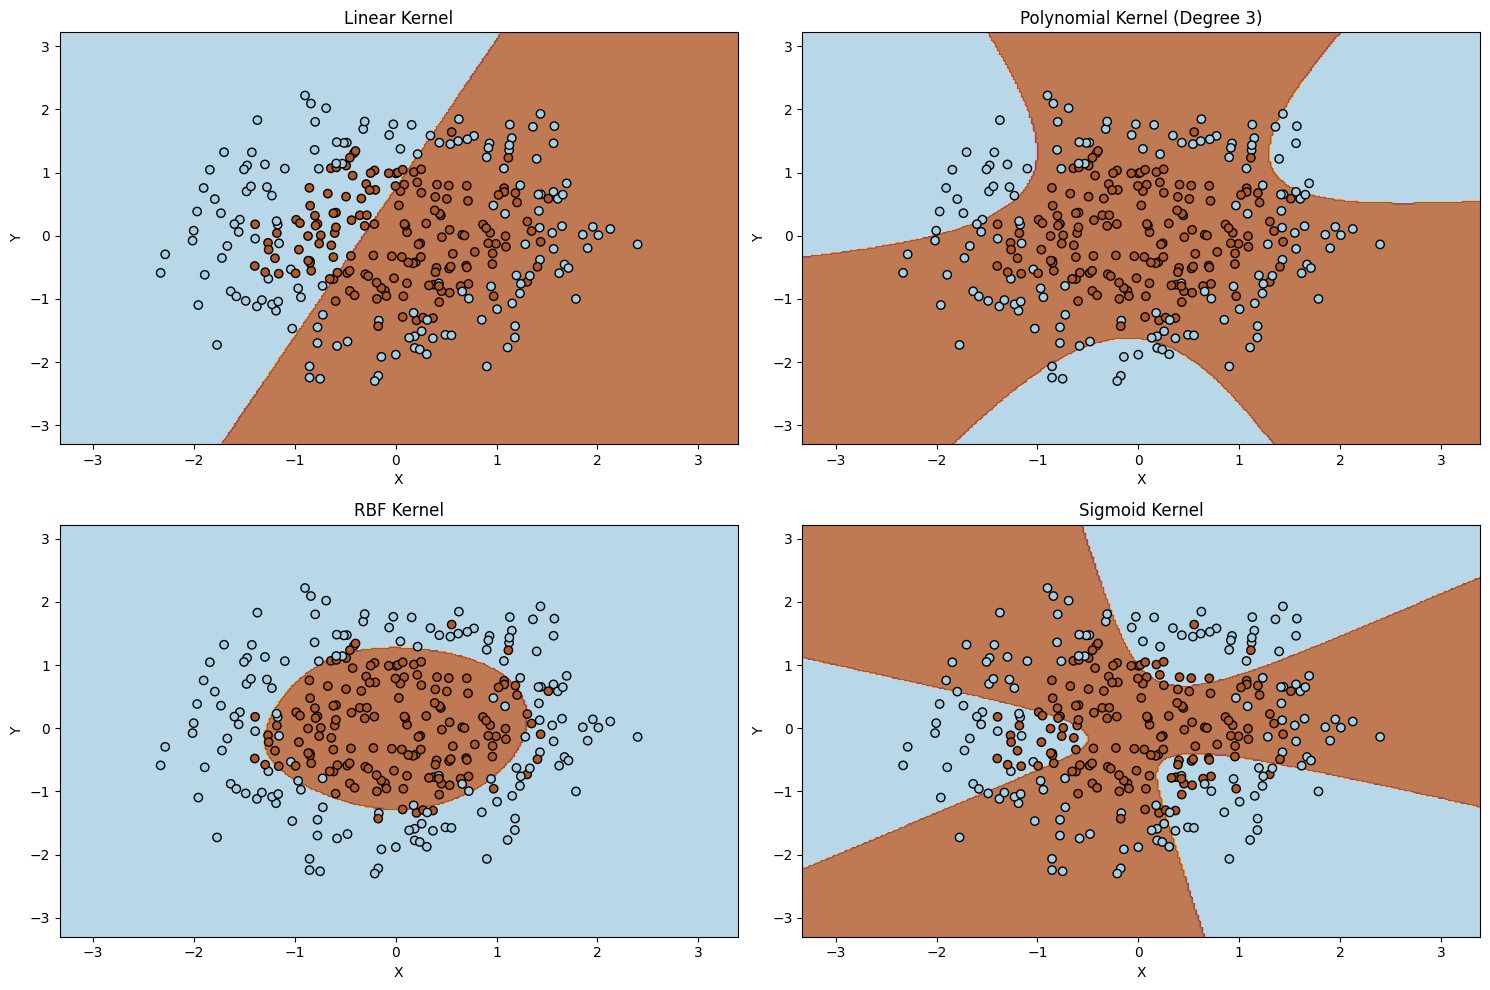

In [80]:
from sklearn.preprocessing import StandardScaler

# make_circles 데이터 생성
X, y = make_circles(n_samples=300, factor=0.5, noise=0.2, random_state=19980719)

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 시각화를 위한 함수
def plot_svm_decision_boundary(X, y, model, title):
    # 결정 경계를 위한 그리드 생성
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # 모델로 예측
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 결정 경계 시각화
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')

# 1. Linear Kernel
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_scaled, y)
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plot_svm_decision_boundary(X_scaled, y, linear_svm, 'Linear Kernel')

# 2. Polynomial Kernel
poly_svm = SVC(kernel='poly', degree=3)
poly_svm.fit(X_scaled, y)
plt.subplot(2, 2, 2)
plot_svm_decision_boundary(X_scaled, y, poly_svm, 'Polynomial Kernel (Degree 3)')

# 3. RBF Kernel
rbf_svm = SVC(kernel='rbf', gamma=0.7)
rbf_svm.fit(X_scaled, y)
plt.subplot(2, 2, 3)
plot_svm_decision_boundary(X_scaled, y, rbf_svm, 'RBF Kernel')

# 4. Sigmoid Kernel
sigmoid_svm = SVC(kernel='sigmoid')
sigmoid_svm.fit(X_scaled, y)
plt.subplot(2, 2, 4)
plot_svm_decision_boundary(X_scaled, y, sigmoid_svm, 'Sigmoid Kernel')

plt.tight_layout()
plt.show()